In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
pip install --upgrade xgboost

     |████████████████████████████████| 157.5MB 32kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
cd 'drive/My Drive/feature file'

/content/drive/My Drive/feature file


In [4]:
#https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def memory_decrease_by_column(df):
  '''This function helps to reduce the memory taken by the dataframe by storing the data in data types of best fit'''  
  col_type_dict={'order_id':np.uint32,'user_id':np.uint32,'order_number':np.uint8,
                 'order_dow':np.uint8,'order_hour_of_day':np.uint8,'days_since_prior_order':np.float16,
                 'product_id':np.uint16,'add_to_cart_order':np.uint8,'reordered':np.uint8,
                 'aisle_id':np.uint8,'department_id':np.uint8,'reordered_new':np.uint8,
                 'user_max_ono':np.uint8,'user_sum_reord':np.uint16,'user_reord_prop':np.float16,
                  'user_prod_reord_prop':np.float16,'user_uniqpr':np.uint16,'user_uniqpr_prop':np.float16,
                  'user_order_reord_prop':np.float16,'user_dsp_mean':np.float16,'user_min_order_size':np.uint8,
                  'user_max_order_size':np.uint8,'user_mean_order_size':np.float16,
                  'product_ratios_users_oneshot':np.float16,'product_cart_mean':np.float16,
                  'product_reord_count':np.uint32,'product_reord_prop':np.float16,
                  'prod_uniq_us':np.uint32,'prod_uniq_us_prop':np.float16,
                  'prod_us_reord_prop':np.float16,'user_days_since_product':np.float16,'user_product_hod_mean':np.float16,
'user_product_dow_mean':np.float16,'user_product_prop':np.float16,
'user_product_cnt':np.uint8,'user_product_atc_mode_min':np.uint8,
'user_product_atc_mode_max':np.uint8,'user_product_atc_min':np.uint8,
'user_product_atc_max':np.uint8,'user_product_atc_mean':np.float16,
'aisle_reordered':np.uint32,'aisle_reordered_prop':np.float16,
'dep_reordered':np.uint32,'dep_reordered_prop':np.float16,
'order_dow_reordered':np.uint32,'order_dow_reordered_prop':np.float16,
'order_hod_reordered':np.uint32,'order_hod_reordered_prop':np.float16,
'order_dow_hod_reord_count':np.uint32,'ono_dsp_reord':np.uint32,
'order_dow_hod_reord_prop':np.float16,'ono_dsp_reord_prop':np.float16,
'atc_reordered':np.uint32,
'atc_reordered_prop':np.float16,'product_ordered_today':np.uint8,
'user_days_since_product_corrected':np.float16}

  start_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
  for i in df.columns:
    if df[i].dtype!= object:
      df[i]=df[i].astype(col_type_dict[i])
    else:
      df[i] = df[i].astype('category')
  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
  return df


In [9]:
#loading orders data from disk
orders=pd.read_csv('orders.csv')
print(orders.shape)
print(orders.head())

(3421083, 7)
   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]


In [10]:
#reducing memory of orders
orders=memory_decrease_by_column(orders)

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%


In [11]:
#loading order_products_prior from disk
order_products_prior=pd.read_csv('order_products__prior.csv')
print(order_products_prior.shape)
print(order_products_prior.head(2))

(32434489, 4)
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1


In [12]:
#reducing memory of order_products__prior
order_products_prior=memory_decrease_by_column(order_products_prior)

Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 247.46 MB
Decreased by 75.0%


In [13]:
#combining user order and order product information of prior set
user_order_products_prior=pd.merge(orders[orders.eval_set=='prior'],order_products_prior,on='order_id',how='left')
user_order_products_prior.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered'],
      dtype='object')

In [14]:
#obtaining user and all products the user has purchased
user_products_prior=user_order_products_prior[['user_id','product_id']].drop_duplicates()

In [15]:
#combining user order and order product information for test set
user_order_products_test=pd.merge(orders[orders.eval_set=='test'],user_products_prior,on='user_id',how='left')
user_order_products_test.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id'],
      dtype='object')

In [16]:
#loading products data from disk
products=pd.read_csv('products.csv')
products.drop(['product_name'],axis=1,inplace=True)

In [17]:
#reducing memory of products data
products=memory_decrease_by_column(products)

Memory usage of dataframe is 1.14 MB
Memory usage after optimization is: 0.19 MB
Decreased by 83.3%


In [18]:
#preparing the train dataset
user_order_products_test1=pd.merge(user_order_products_test,products,on='product_id',how='left')
print(user_order_products_test1.shape)
print(user_order_products_test1.columns)

(4833292, 10)
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id', 'aisle_id',
       'department_id'],
      dtype='object')


In [19]:
#loading user features from disk and decreasing its memory
user_features=pd.read_csv('user_features.csv')
user_features=memory_decrease_by_column(user_features)

Memory usage of dataframe is 18.88 MB
Memory usage after optimization is: 4.52 MB
Decreased by 76.0%


In [20]:
#combining user features with existing data
user_order_products_test1=pd.merge(user_order_products_test1,user_features,on='user_id',how='left')
print(user_order_products_test1.shape)
print(user_order_products_test1.head())

(4833292, 21)
   order_id  user_id  ... user_max_order_size  user_mean_order_size
0   2774568        3  ...                  11              7.332031
1   2774568        3  ...                  11              7.332031
2   2774568        3  ...                  11              7.332031
3   2774568        3  ...                  11              7.332031
4   2774568        3  ...                  11              7.332031

[5 rows x 21 columns]


In [21]:
#loading product features from disk and reducing its memory
product_features=pd.read_csv('product_features.csv')
product_features=memory_decrease_by_column(product_features)

Memory usage of dataframe is 3.03 MB
Memory usage after optimization is: 0.95 MB
Decreased by 68.7%


In [22]:
#merging product features with the remaining data
user_order_products_test1=pd.merge(user_order_products_test1,product_features,on='product_id',how='left')
print(user_order_products_test1.shape)
print(user_order_products_test1.head())

(4833292, 28)
   order_id  user_id  ... prod_uniq_us_prop  prod_us_reord_prop
0   2774568        3  ...          0.349609            0.469238
1   2774568        3  ...          0.421875            0.383057
2   2774568        3  ...          0.507812            0.358154
3   2774568        3  ...          0.301758            0.566406
4   2774568        3  ...          0.426270            0.430420

[5 rows x 28 columns]


In [23]:
#loading remaining features and reducing their memory
user_product_features=pd.read_csv('user_product_features.csv')
user_product_features=memory_decrease_by_column(user_product_features)
aisle_features=pd.read_csv('aisle_features.csv')
aisle_features=memory_decrease_by_column(aisle_features)
dep_features=pd.read_csv('dep_features.csv')
dep_features=memory_decrease_by_column(dep_features)
order_dow_features=pd.read_csv('order_dow_features.csv')
order_dow_features=memory_decrease_by_column(order_dow_features)
order_hod_features=pd.read_csv('order_hod_features.csv')
order_hod_features=memory_decrease_by_column(order_hod_features)
order_dow_hod_features=pd.read_csv('order_dow_hod_features.csv')
order_dow_hod_features=memory_decrease_by_column(order_dow_hod_features)
ono_dsp_features=pd.read_csv('ono_dsp_features.csv')
ono_dsp_features=memory_decrease_by_column(ono_dsp_features)
atc_features=pd.read_csv('atc_features.csv')
atc_features.columns=['user_product_atc_mode_min','atc_reordered','atc_reordered_prop']
atc_features=memory_decrease_by_column(atc_features)

Memory usage of dataframe is 1218.38 MB
Memory usage after optimization is: 266.52 MB
Decreased by 78.1%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 68.1%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 56.5%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 40.2%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 58.0%
Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.00 MB
Decreased by 73.3%
Memory usage of dataframe is 0.09 MB
Memory usage after optimization is: 0.02 MB
Decreased by 71.8%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 68.3%


In [24]:
# merging remaining features with the existing data
user_order_products_test1=pd.merge(user_order_products_test1,user_product_features,on=['user_id','product_id'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,aisle_features,on=['aisle_id'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,dep_features,on=['department_id'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,order_dow_features,on=['order_dow'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,order_hod_features,on=['order_hour_of_day'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,order_dow_hod_features,on=['order_dow','order_hour_of_day'],how='left')
user_order_products_test1=pd.merge(user_order_products_test1,ono_dsp_features,on=['order_number','days_since_prior_order'],how='left')


In [25]:
#calculating user_days_since_product_corrected and product ordered today
user_order_products_test1=pd.merge(user_order_products_test1,atc_features,on=['user_product_atc_mode_min'],how='left')
user_order_products_test1['user_days_since_product_corrected']=user_order_products_test1['user_days_since_product']+user_order_products_test1['days_since_prior_order']
user_order_products_test1['product_ordered_today']=user_order_products_test1['user_days_since_product_corrected'].apply(lambda x: 1 if x==0 else 0)


In [26]:
#dropping unnecessary columns
user_order_products_test1.drop(['eval_set'],axis=1,inplace=True)

In [27]:
#filling nan with 0
user_order_products_test1.fillna(0,inplace=True)

In [28]:
#reducing memory of user_order_products_test1
user_order_products_test1=memory_decrease_by_column(user_order_products_test1)

Memory usage of dataframe is 613.05 MB
Memory usage after optimization is: 562.35 MB
Decreased by 8.3%


In [29]:
#preparing X_test
useless_columns=['order_id','user_id','product_id','aisle_id','department_id','atc_reordered']
X_test=user_order_products_test1.drop(useless_columns,axis=1)

In [30]:
#loading column order
train_columns=pd.read_csv('train_columns.csv')
train_columns=train_columns.train_columns.values


In [31]:
#preparing X_test
X_test=X_test[train_columns]

In [32]:
#min max scaling test data
X_train_statistics=pd.read_csv('X_train_statistics.csv')
X_train_min=X_train_statistics.X_train_min
X_train_min.index=X_test.columns
X_train_max=X_train_statistics.X_train_max
X_train_max.index=X_test.columns
X_train_max_min=X_train_statistics.X_train_max_min
X_train_max_min.index=X_test.columns
X_test=(X_test-X_train_min)/(X_train_max_min)

In [45]:
X_test.to_csv('X_test_scaled.csv',index=False)

In [5]:
X_test=pd.read_csv('X_test_scaled.csv')
X_test=memory_decrease_by_column(X_test)

Memory usage of dataframe is 1733.13 MB
Memory usage after optimization is: 451.72 MB
Decreased by 73.9%


**Logistic Regression**

In [29]:
#loading model from disk
import pickle
logreg=pickle.load(open('logistic_reg.pkl','rb'))

In [30]:
#predicting labels of X_test based on 0.2 threshold found with cv
pred_test_y=logreg.predict_proba(X_test)
pred_test_y=pred_test_y[:,1]>=0.2

In [31]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
0,2774568,9387
1,2774568,17668
4,2774568,39190


In [7]:
def prepare_data(x):
  '''function to make a list of products as expected in the competition'''
  return ' '.join(list(x.astype(str)))

In [33]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]


,order_id,products
0,17,47766 21709 13107 38777
1,34,47029 47792 39180 39475 43504 13176 47766 2113...
2,137,24852 38689 41787 23794 29594
3,182,33000 13629 27104 39275 5479 35951 9337 47672 ...
4,257,24852 49235 30233 27104 45013 29837 27966 2113...
...,...,...
74995,3420740,19660 13176 47209 8174 34429 39928 39146 49005
74996,3420877,27966 13176 23765 13646 43122 10768 49111 6567...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,30169 43210 35004 35951 5134 13517 21616 8277 ...


In [36]:
#storing submission file to disk
submission[['order_id','products']].to_csv('logistic_regression_submission.csv',index=False)

**Random Forest Classifier**

In [37]:
#loading random forest classifier model from disk
rf_clf=pickle.load(open('rf_clf.pkl','rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [38]:
#predicting labels of X_test
pred_test_y=rf_clf.predict(X_test)

In [39]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
1,2774568,17668
4,2774568,39190
5,2774568,47766


In [40]:
def prepare_data(x):
  '''function to make a list of products as expected in the competition'''
  return ' '.join(list(x.astype(str)))

In [41]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]


,order_id,products
0,17,47766 21709 13107 38777 21463 39275
1,34,47792 39180 39475 43504 13176 47766 21137 1608...
2,137,24852 38689 41787 25890 23794 29594 2326
3,182,33000 13629 39275 12456 5479 9337 47672 47209 ...
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 13176 47209 8174 27966 39146 49005 35951
74996,3420877,27966 13176 23765 13646 43122 10768 49111 8193...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,43210 35004 35951 5134 13517 21616 46676 47766...


In [43]:
#storing submission file to disk
submission[['order_id','products']].to_csv('random_forest_submission.csv',index=False)

**XGB Classifier**

In [6]:
#loading xgb classifier model from disk
import pickle
xgb_clf=pickle.load(open('xgb_clf.pkl','rb'))

In [36]:
#predicting labels of X_test based on 0.2 threshold found with cv
pred_test_y=xgb_clf.predict_proba(X_test)
pred_test_y=(pred_test_y[:,1]>=0.2)

In [38]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
1,2774568,17668
4,2774568,39190
5,2774568,47766


In [41]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]


,order_id,products
0,17,47766 21709 13107 21463
1,34,47792 39180 39475 43504 13176 47766 21137 1608...
2,137,24852 38689 41787 25890 23794 29594 2326 5134
3,182,33000 13629 39275 5479 9337 47672 47209 11520
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 13176 8174 34429 39928 39146 49005
74996,3420877,27966 13176 23765 13646 43122 10768 49111 6567...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,43210 35004 35951 5134 13517 21616 46676 47766...


In [43]:
#saving submission to disk
submission[['order_id','products']].to_csv('xgb_submission.csv',index=False)

**LGBM Classifier**

In [44]:
#loading lgbm classifier from disk
lgbm=pickle.load(open('lbgm_clf.pkl','rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [45]:
#predicting labels of X_test
pred_test_y=lgbm.predict(X_test)
pred_test_y.shape

(4833292,)

In [46]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
0,2774568,9387
1,2774568,17668
3,2774568,16797


In [47]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]

,order_id,products
0,17,47766 21709 13107 38777 21463
1,34,47029 47792 39180 39475 43504 13176 47766 2113...
2,137,24852 38689 41787 25890 23794 29594 2326 5134
3,182,33000 13629 39275 12456 5479 9337 47672 47209 ...
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 13176 47209 8174 34429 27966 47621 28476...
74996,3420877,27966 13176 23765 13646 43122 10768 49111 6567...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,30169 43210 35004 35951 5134 13517 21616 46676...


In [49]:
#saving submission file to disk
submission[['order_id','products']].to_csv('lgbm_submission.csv',index=False)

**Adaboost**

In [50]:
#loading adaboost classifier from disk
ada_clf=pickle.load(open('ada_clf.pkl','rb'))

In [51]:
#predicting labels of X_test
pred_test_y=(ada_clf.predict_proba(X_test)[:,1]>=0.4)
pred_test_y.shape

(4833292,)

In [63]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
0,2774568,9387
1,2774568,17668
3,2774568,16797


In [64]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]

,order_id,products
0,17,13107 38777 15613 44056 18288 16965 21463 4000...
1,34,47029 47792 39180 10132 35887 7559 39475 43504...
2,137,24852 38689 41787 25890 44422 23794 29594 2326...
3,182,2078 33000 1244 34243 13629 27104 39275 3397 1...
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 39040 13176 47209 8174 34429 38772 30391...
74996,3420877,27966 13176 23765 13646 43122 10768 49111 6567...
74997,3420888,44632 22935 43961 47766 35951 7963 42123 10880...
74998,3420989,30169 43210 35004 35951 5134 13517 21616 46676...


In [65]:
#saving submission file to disk
submission[['order_id','products']].to_csv('ada_submission.csv',index=False)

**Neural Network with 7 dense layers**

In [69]:
#loading pretrained model from disk
import tensorflow as tf
best_model=tf.keras.models.load_model('nn_models/layer7_model_f10.36402924385773194')
pred_test_y=(best_model.predict(X_test,batch_size=10000)>=0.2)

In [70]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
1,2774568,17668
4,2774568,39190
5,2774568,47766


In [71]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]

,order_id,products
0,17,47766 13107 None
1,34,47792 39180 39475 43504 13176 47766 21137 1608...
2,137,24852 38689 41787 25890 23794 29594 2326 5134
3,182,33000 13629 39275 5479 9337 47672 47209 32109 ...
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 13176 47209 8174 34429 38772 47621 39928...
74996,3420877,27966 13176 23765 13646 43122 10768 49111 2190...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,30169 43210 35004 35951 5134 13517 21616 46676...


In [72]:
#saving submission file to disk
submission[['order_id','products']].to_csv('nn7_submission.csv',index=False)

**CNN model**

In [73]:
#loading pretrained cnn model from disk
best_model=tf.keras.models.load_model('nn_models/conv_model_f10.3654403235929674')
pred_test_y=(best_model.predict(X_test,batch_size=1000)>=0.2)

In [74]:
#preparing output
user_order_products_test1['pred_reordered']=pred_test_y
submission=user_order_products_test1[user_order_products_test1.pred_reordered==1][['order_id','product_id']]
submission.columns=['order_id','products']
submission.head(3)

,order_id,products
1,2774568,17668
4,2774568,39190
5,2774568,47766


In [75]:
#preparing the submission
sample_submission=pd.read_csv('sample_submission.csv',usecols=['order_id'])
submission=submission.groupby('order_id')['products'].agg(prepare_data).reset_index()
submission=pd.merge(sample_submission,submission,how='left',on='order_id')
submission.fillna('None',inplace=True)
#adding None to products for which we are predicting only upto two products to maximize f1 score
submission['len']=submission.products.apply(lambda x: 0 if x=='None' else len(x.split(' ')))
submission['products']=submission.apply(lambda x: x.products+' None' if (x.len==1 or x.len==2) else x.products ,axis=1)
submission[['order_id','products']]

,order_id,products
0,17,13107 None
1,34,47792 39180 39475 43504 13176 47766 21137 1608...
2,137,24852 38689 41787 25890 23794 29594 2326 5134
3,182,33000 13629 39275 5479 9337 47672 47209 41149 ...
4,257,24852 49235 4605 30233 27104 45013 29837 27966...
...,...,...
74995,3420740,19660 13176 8174 34429 47621 39928 39146 48070...
74996,3420877,27966 13176 13646 43122 10768 49111 6567 21903...
74997,3420888,44632 22935 43961 47766 35951 7963 10880 46906...
74998,3420989,43210 35004 35951 5134 13517 21616 46676 47766...


In [76]:
#saving submission file to disk
submission[['order_id','products']].to_csv('cnn_submission.csv',index=False)

**Summary**

In [79]:
#displaying model scores
from beautifultable import BeautifulTable


headers=['Model','Private f1 score', 'Public f1 score']
summary_data = [['logistic regression','0.36534','0.36699'],
                ['Random Forest Classifier','0.38149','0.38239'],
                ['XGB Classifier','0.38239','0.38387'],
                ['LGBM Classifier','0.38073','0.38244'],
                ['NN 7 dense Classifier','0.38359','0.38552'],
                ['CNN Classifier','0.38459','0.38677']
                ]



table=BeautifulTable(max_width=110)
table.columns.header=headers


for row in summary_data:
    table.rows.append(row)
    
print(table)

+--------------------------+------------------+-----------------+
|          Model           | Private f1 score | Public f1 score |
+--------------------------+------------------+-----------------+
|   logistic regression    |      0.365       |      0.367      |
+--------------------------+------------------+-----------------+
| Random Forest Classifier |      0.381       |      0.382      |
+--------------------------+------------------+-----------------+
|      XGB Classifier      |      0.382       |      0.384      |
+--------------------------+------------------+-----------------+
|     LGBM Classifier      |      0.381       |      0.382      |
+--------------------------+------------------+-----------------+
|  NN 7 dense Classifier   |      0.384       |      0.386      |
+--------------------------+------------------+-----------------+
|      CNN Classifier      |      0.385       |      0.387      |
+--------------------------+------------------+-----------------+


/usr/local/lib/python3.6/dist-packages/beautifultable/utils.py:136: FutureWarning: 'max_width' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'maxwidth' instead.
  warnings.warn(message, FutureWarning)


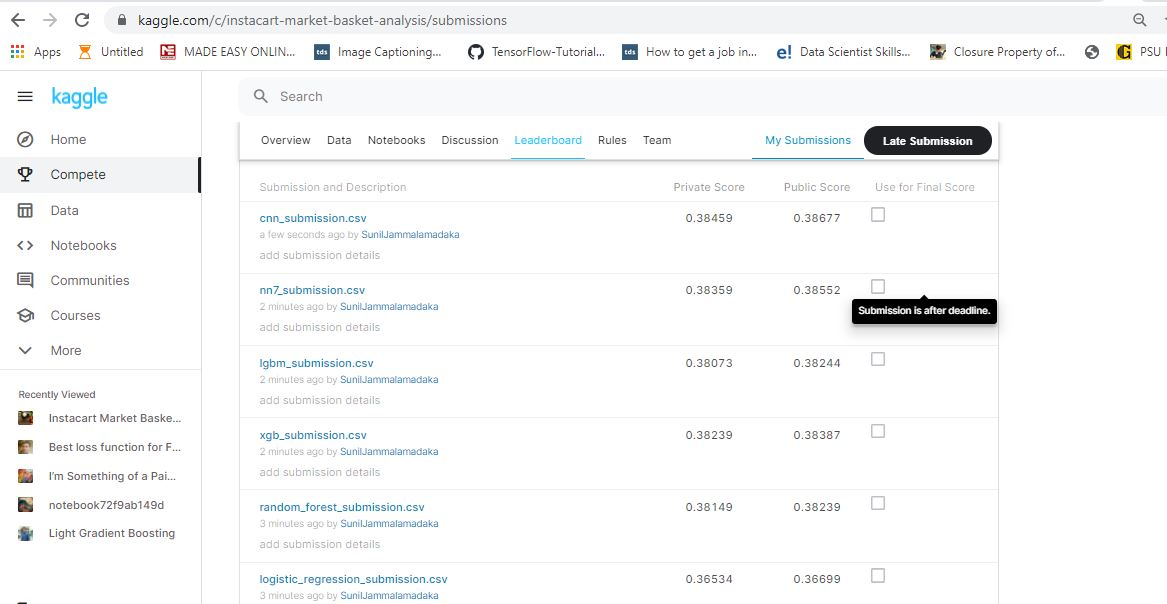

**Conclusion**

Out of all the models we have tried, CNN Classifier gave the best private and public mean f1 score of about 0.38459 and 0.38677 respectively